   ## Word Cloud and Sentiment Analysis on Douban posts from the Goose Club

This preject aims to analyze how the public attitude changed during the past 2 weeks after Wuhan being locked down. As a Wuhan local who has been retained as home for more than one month (and will be retained for longer), I can only obtain most updated information about other people's lives from the internet. However, we should notice that most of the internet users are young people age from 15 to 45 years old and analyzing their posts can investigate into how young people are living and what problems they took attention to during this special period of time.

Douban Goose Club was chosen because it is a very influential forum with over 600,000 active members. Most of the members are born from 1980s to 2000s and they are open-minded to information worldwide. The topics of their posts could reflect their comments and attitudes towards one single event (such as the death of Doctor Li Wenliang and the Misbehave of Wuhan Red Cross Organization). Most of the posts are closely related to the most trending events with vivid expression of their attitudes. Furthermore, unlike Weibo and other social network, there is no official accounts on Douban. In this case, all the posts gathered from Douban represent different personal thoughts not official information without any emotion. So, we can analyze the emotion scores based on these posts.

The project will be divided into three parts:
1. Web Crawler: grab all the information (post dates, author ID and topics) from Douban Goose Group official website.
2. Data Preprocessing: use Jieba and Word Cloud library to cut words, visualize the word frequencies and propare for emotion dictionaries for later analysis.
3. Sentiment Analysis: use emotion dictionaries modified based on the data preprocessing results, calculate the emotion scores and discover how public attitutes changed as time passed by.


### Part 1: Web Crawler on Douban Goose Group

This part aims to grab the information on Post Dates, Topics and Author ID from Douban Goose Group official website using re and requests libraries with Python.

In [16]:
import requests
from lxml import etree
import re
import pandas as pd
import numpy as np
import string

#### As Douban limits web crawlers to grab at most 250 posts every day and each page contains 25 posts, here we write a function to get the url links for the top 10 pages and then use requests library to read all the url links.

In [22]:
def url_link(page):
    url_prefix = 'https://www.douban.com/group/blabla/discussion?start='
    last_number = str(25*(page-1))
    return url_prefix+last_number

In [25]:
page = 1
all_tds_topic = []
all_tds_authors = []

while page in range(1,11):
    url = url_link(page)
    headers ={
    'User-Agent': "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Mobile Safari/537.36",
    'referer': "https://www.douban.com/group/blabla/discussion?start=50",
    'cookie' : "ll='118254'; bid=MC1caDxrffo; __utmc=30149280; __gads=ID=c86b48420f01129d:T=1580733994:S=ALNI_Mbr-xJgRz0T6fwf9dbP_IWIgt0zGg; _vwo_uuid_v2=DE1CC8A36A1E31E949DA8B5A667934A27|9ca8d8d7b6f4ce1a3d8268dbcf49884e; ap_v=0,6.0; __utma=30149280.230563982.1580733992.1580816992.1580972719.4; __utmz=30149280.1580972719.4.3.utmcsr=baidu|utmccn=(organic)|utmcmd=organic; _pk_ref.100001.8cb4=%5B%22%22%2C%22%22%2C1580972741%2C%22https%3A%2F%2Fwww.baidu.com%2Flink%3Furl%3DQPafe5o4gyJWmMY4q963exLNCAgJ2emrTrZweLKbTmikTvKp8S6TBttz2qeiaCuE%26wd%3D%26eqid%3Dbdd61e3b0005452f000000065e3bbac1%22%5D; _pk_ses.100001.8cb4=*; __utmt=1; __yadk_uid=QM5lwR7CWd5uzCNSDDq1YSLDSkltIlVN; _pk_id.100001.8cb4=5fa51cbd839e0c79.1580733988.3.1580972790.1580801311.; __utmb=30149280.15.6.1580972791211"
}
    res = requests.get(url = url, headers = headers)
    text = res.text
    html = etree.HTML(text)
    td = html.xpath("//td[@class='title']")
    td1 = html.xpath("//td[@nowrap='nowrap']/a[@href]")
    all_tds_topic = all_tds_topic+td
    all_tds_authors = all_tds_authors+td1
    page = page+1

In [26]:
len(all_tds_topic)

0

In [20]:
# Get Content of all the topics

i=0
all_urls =[]
all_topics =[]

while i in range(0,len(all_tds_topic)):
    topic = all_tds_topic[i].xpath("./a")
    etree.tostring(topic[0], encoding='utf-8').decode('utf-8')
    title_url = topic[0].xpath("@href")
    title_topic = topic[0].xpath("@title")
    all_urls = all_urls+title_url
    all_topics = all_topics+title_topic
    i=i+1

In [21]:
all_urls

[]

In [10]:
all_topics

['蔡徐坤的6000万专辑销量如果放到韩圈里solo什么水平？',
 '公布了 北大人民医院确诊3人，复兴医院确诊34人……',
 '法证先锋4这一集的教唆杀人算是教唆杀人吗（含剧透）',
 '说你最近最开心的时刻吧～',
 '原来很多cp在一起几年后就基本无xing了…',
 '这次疫情，让你的什么观念彻底改变了？',
 '史上十大夫妻',
 '在疫情重灾区汉口 鹅们帮我看看这种口罩靠谱不',
 '她新封面，港风嫩模！！！！！！！！！！！！',
 '有哪些故事性很强的民歌？',
 '大胆开麦，许光汉真的不丑。',
 '求补课',
 '被爱回家开心速递的送水辉气死',
 '重庆鹅看过来，朋友捡到一只二哈！！！项圈写的警犬！！你们瞧不起二哈！！！',
 '富大龙老婆真漂亮，可惜退圈了',
 '“待凛冬离去 雪融草青”王源这句话好火，这是《环球人物》邀请他写专栏的第三年',
 '你们you guys看过have seen这个微博this weibo没有，都进来笑',
 '在八组骂“八婆”是什么水平？',
 '一人讲个芒果的八卦吧',
 '辽宁鹅进来挨夸',
 '八组什么时候沦为粉丝用爱的自留地了吗？这里是微博超话吗？？？',
 '总有一种帖子一天24小时阴魂不散的顶在最前面，但你永远都不会点开',
 '又发现她的一颗头',
 '鹅们看这个小哥算是高配版宋威龙吗',
 '强咚接受财新关于假货整顿的采访，笑死',
 '重温《三流之路》，依旧好看的冒泡',
 '管轶最新出来说话：走私穿山甲携冠状病毒，与新冠高度相似',
 '你们一定要看傅园慧和贝爷的这个视频，笑到头掉！贝爷:我以为她要变异了😂😂😂😂😂😂😂',
 '从90年代花旦到2019的花旦，真的是越来越丑了',
 '猪肉的价格还有可能回到以前吗？',
 '《法证先锋》系列哪部最好看呀',
 '（5分钟就破案了)求问一首欧美的老歌，整首歌女的唱一句男的就销魂地“啊～”一句',
 '翻到了家里96年颁发的一孩生育证',
 '芒果TV新综艺这地段这装修的房子在长沙要多少钱？？在装修的鹅可以来学布置了。',
 '为啥当年龙门飞甲最后是陈坤的厂花最出圈了？',
 '看了日本专家的视频打算备货了',
 '看完"想见你"为了move on看了"一把青"，太难了。。。',
 '这么多剧先播哪个？有的还没拍完……',
 '新世界里金海为啥

In [11]:
#Get information on all the authors

i = 0
all_authors = []
while i in range(0,len(all_tds_authors)):
    etree.tostring(all_tds_authors[i], encoding='utf-8').decode("utf-8")
    authors = all_tds_authors[i].xpath("@href")
    all_authors = all_authors + authors
    print(authors)
    i=i+1

['https://www.douban.com/people/46740507/']
['https://www.douban.com/people/77690825/']
['https://www.douban.com/people/171892340/']
['https://www.douban.com/people/76498330/']
['https://www.douban.com/people/68750684/']
['https://www.douban.com/people/42675223/']
['https://www.douban.com/people/73228814/']
['https://www.douban.com/people/32067496/']
['https://www.douban.com/people/66780341/']
['https://www.douban.com/people/4376951/']
['https://www.douban.com/people/150085438/']
['https://www.douban.com/people/52840108/']
['https://www.douban.com/people/138787548/']
['https://www.douban.com/people/l.thRee/']
['https://www.douban.com/people/66165116/']
['https://www.douban.com/people/71389355/']
['https://www.douban.com/people/82243722/']
['https://www.douban.com/people/52393177/']
['https://www.douban.com/people/74040033/']
['https://www.douban.com/people/170647743/']
['https://www.douban.com/people/76925323/']
['https://www.douban.com/people/58969599/']
['https://www.douban.com/peopl

In [12]:
all_authors

['https://www.douban.com/people/46740507/',
 'https://www.douban.com/people/77690825/',
 'https://www.douban.com/people/171892340/',
 'https://www.douban.com/people/76498330/',
 'https://www.douban.com/people/68750684/',
 'https://www.douban.com/people/42675223/',
 'https://www.douban.com/people/73228814/',
 'https://www.douban.com/people/32067496/',
 'https://www.douban.com/people/66780341/',
 'https://www.douban.com/people/4376951/',
 'https://www.douban.com/people/150085438/',
 'https://www.douban.com/people/52840108/',
 'https://www.douban.com/people/138787548/',
 'https://www.douban.com/people/l.thRee/',
 'https://www.douban.com/people/66165116/',
 'https://www.douban.com/people/71389355/',
 'https://www.douban.com/people/82243722/',
 'https://www.douban.com/people/52393177/',
 'https://www.douban.com/people/74040033/',
 'https://www.douban.com/people/170647743/',
 'https://www.douban.com/people/76925323/',
 'https://www.douban.com/people/58969599/',
 'https://www.douban.com/peopl

In [13]:
len(all_authors)

250

In [14]:
#Get information on the all the post dates

i=0
post_dates = []

while i in range(0,len(all_urls)):
    url = all_urls[i]
    headers ={
    'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Mobile Safari/537.36'
}
    response = requests.get(url=url, headers=headers)
    text = response.text
    post_date = re.findall(r'<span class="timestamp">(.*?)</span>', text)
    post_dates = post_dates+post_date
    i=i+1

#### Now all the required information has been restored in lists, we need to convert them into one dataframe.

In [15]:
dist_1 = {
}
i = 0
while i in range(0, 250):
    dist = {
        'Topic'+str(i): all_topics[i],
    }
    dist_1.update(dist)
    i=i+1

In [ ]:
dist_2 = {
}
i = 0
while i in range(0, 250):
    dist = {
        'Author'+str(i): all_authors[i],
    }
    dist_2.update(dist)
    i=i+1

In [ ]:
len(post_dates)

In [ ]:
dist_3 = {
}
i = 0
while i in range(0, 250):
    dist = {
        'Post_date'+str(i): post_dates[i],
    }
    dist_3.update(dist)
    i=i+1

In [ ]:
df_topics = pd.DataFrame(data=dist_1.values(), index=range(0,250),columns=['Topics'])
df_authors = pd.DataFrame(data=dist_2.values(), index=range(0,250),columns=['Authors'])
df_post_date = pd.DataFrame(data=dist_3.values(), index=range(0,250),columns=['Post Dates'])

In [ ]:
df = pd.merge(df_topics,df_authors, left_index=True, right_index=True)
df_final = pd.merge(df,df_post_date, left_index=True, right_index=True)

In [ ]:
df_final.head()

In [ ]:
def get_ID(link):
    return link.split('/')[-2]

In [ ]:
df_final['ID']=df['Authors'].apply(get_ID)

In [ ]:
df_final.head()

In [ ]:
df_final.to_csv('webspider_douban_20200221.csv', index = False)

#### Due to the web crawling limits every day, in order to get enough information for later analysis, the above codes were used to keep tracking the top 250 topics from 02/07/2020 to 02/21/2020. It was supposed to track longer time but Douban Goose Group was temporarily closed on 02/21/2020. So, the following analysis will be based on the data for the past two weeks.

### Part2: Data Preprocessing

This part mainly explores insights on the content of all the topics. Jieba and Word Cloud library will be used to calculate the visualize the word frequencies. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from collections import Counter
import nltk
import jieba
from pylab import mpl

In [3]:
#First load all the dataset into python and convert them into one data frame.

df1 = pd.read_csv('webspider_douban_20200207.csv')
df2 = pd.read_csv('webspider_douban_20200210.csv')
df3 = pd.read_csv('webspider_douban_20200211.csv')
df4 = pd.read_csv('webspider_douban_20200213.csv')
df5 = pd.read_csv('webspider_douban_20200214.csv')
df6 = pd.read_csv('webspider_douban_20200218.csv')
df7 = pd.read_csv('webspider_douban_20200219.csv')
df8 = pd.read_csv('webspider_douban_20200220.csv')
df9 = pd.read_csv('webspider_douban_20200221.csv')

df_concat = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=0, ignore_index=True)

df_concat.head()

/Users/darcyluo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


,Authors,ID,Post Dates,Topics
0,https://www.douban.com/people/4623385/,NaN,NaN,日本预测重庆大爆发？15万人？
1,https://www.douban.com/people/133641969/,NaN,NaN,有蚊子了！！！！！！！！！
2,https://www.douban.com/people/54516641/,NaN,NaN,上海只公布了昨天确诊的轨迹，地址就错了3个！！！
3,https://www.douban.com/people/57429732/,NaN,NaN,突然觉得生小孩真的很没有意思
4,https://www.douban.com/people/83779880/,NaN,NaN,湖北潜江市委sj:从武汉得到消息后“先下手”，哪怕冒风险！


In [4]:
# Then fill the null values in the dataframe.

# The ID column should be filled according to the the Authors column. In fact, the author ID lies before the last slash of the url link in the Authors column.

def get_ID(link):
    return link.split('/')[-2]

df_concat['ID']=df_concat['Authors'].apply(get_ID)

In [5]:
# As the codes failed to grab the Post Dates information for the first four days, we will auto fill the post dates in line with the collecting dates.

df_concat['Post Dates'].iloc[0:250].fillna(value='2020-02-07', inplace = True)
df_concat['Post Dates'].iloc[250:500].fillna(value='2020-02-10', inplace = True)
df_concat['Post Dates'].iloc[500:750].fillna(value='2020-02-11', inplace = True)
df_concat['Post Dates'].iloc[750:1000].fillna(value='2020-02-13', inplace = True)

In [6]:
df_concat.head()

,Authors,ID,Post Dates,Topics
0,https://www.douban.com/people/4623385/,4623385,2020-02-07,日本预测重庆大爆发？15万人？
1,https://www.douban.com/people/133641969/,133641969,2020-02-07,有蚊子了！！！！！！！！！
2,https://www.douban.com/people/54516641/,54516641,2020-02-07,上海只公布了昨天确诊的轨迹，地址就错了3个！！！
3,https://www.douban.com/people/57429732/,57429732,2020-02-07,突然觉得生小孩真的很没有意思
4,https://www.douban.com/people/83779880/,83779880,2020-02-07,湖北潜江市委sj:从武汉得到消息后“先下手”，哪怕冒风险！


In [7]:
#There is no null values in the data frame now.

df_concat.isnull().sum()

Authors       0
ID            0
Post Dates    0
Topics        0
dtype: int64

In [8]:
# However, we should notice that it is possible for those hot topics, they will stick on the top 250 topics for more than one day. 
# In this case, we need to remove the repeated topics before analyzing the content of the topics.

topics = []
for i in df_concat['Topics']:
    topics.append(i)

count_topics = Counter(topics)
topics_common = count_topics.most_common()

topics_remove = []
for i in topics:
    if i not in topics_remove:
        topics_remove.append(i)

In [9]:
# Use jiba to divide topics into single words
topics_s=[]
for topic in topics_remove:
    topics_cut = jieba.lcut(topic)
    topics_s.append(topics_cut)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/y8/321pddfd34nb6ysrj4jfj5s80000gn/T/jieba.cache
Loading model cost 0.955 seconds.
Prefix dict has been built successfully.


In [10]:
# Load stop words list

stopwords = [line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8').readlines()]

# Remove stopwors in in the topic list

topics_clean=[]
for line in topics_s:
    line_clean = []
    for word in line:
        if word not in stopwords:
            line_clean.append(word)
    topics_clean.append(line_clean)
    
# remove the repeated words in each line of the list

topics_clean_dist = []
for line in topics_clean:
    line_clean_dist = []
    for word in line:
        if word not in line_clean_dist:
            line_clean_dist.append(word)
    topics_clean_dist.append(line_clean_dist)

# convert all the words into one list

allwords_list = []
for line in topics_clean_dist:
    for word in line:
        allwords_list.append(word)

# Convert the list into dataframe

df_allwords = pd.DataFrame({'allwords': allwords_list})

# Count the repeated words

word_count = df_allwords['allwords'].value_counts().reset_index()
word_count.columns = ['word', 'count']

# Remove the meaningless words and spaces within the top 50 word frequencies
# The meaningless words are dropped because they are just spaces and some connective words which are used very often but represent no helpful information.

word_count.drop(index=[0,1,3,4,7,8,9,12], inplace=True)

In [11]:
word_count.head(50)

,word,count
2,口罩,84
5,疫情,62
6,武汉,59
10,更新,42
11,买,40
13,医生,37
14,日本,37
15,中国,35
16,里,35
17,喜欢,34


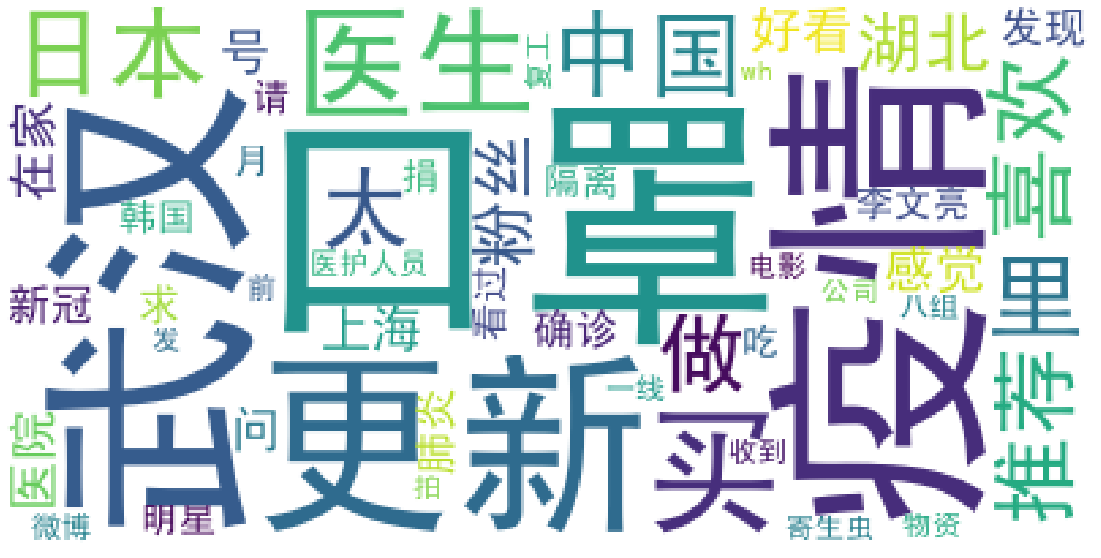

In [68]:
# Use the Word Cloud library to visualize word frequencies

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

#Create word cloud subject and set the parameters within the word cloud

wordcloud=WordCloud(font_path='SimHei.ttf', background_color="white", max_font_size=100, margin=1)

#Fit word frequencies in word cloud

word_frequence={x[0]:x[1] for x in word_count.head(50).values}
wordcloud=wordcloud.fit_words(word_frequence)
word_frequence

#Visualize using the default mode

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
mpimg.imsave("word_cloud_chinese.jpg", wordcloud)

In [15]:
# As all the characters are in Chinese, in order to make them more readable, here we create an English version of it.
from translate import Translator
translator = Translator(from_lang="chinese",to_lang="english")

word_count_100=word_count.head(100)

word_list=[]
for word in word_count_100['word']:
    word_list.append(word)

translation = translator.translate(word_list[0])
translation

'Mask'

In [16]:
Translation_list=[]
i=0
while i in range(0,len(word_list)):
    word_s = translator.translate(word_list[i])
    Translation_list.append(word_s)
    print(word_s)      
    i=i+1

Mask
epidemic
Wuhan
Update
Buy
Doctor
Japan
in China that is confirmed by Gartner.
mile
Like
Matt.
Recommendation
Do
Hubei
Cellophane noodles
Looks good
Number
Shanghai Railway Station
Sensory
CGU
Hospital
At home
Confirmed Incr
New crown
Notice
Pneumonia
beg
Li Wenliang
South Korea
Isolation
The movie star
Donate
Eating
Month
Have read
Please
Health care workers
Supplies
Lambliasis
Company
Movies
Tier-1
Development
WH
Weibo
Slap
Received
Eight groups
Front
Work resumption
Xin
Want to see
Curse
Support
Amway
Donation
love
Popular science
why?
US
🦢
Sanqi
cash
Infections
START
Beijing
years old
Community
High-
Impact
NIAN
Yes
Princess
10,000
Video
Add
Neighbourhood
patch(es)
Friend
Male
which
Feel
20
Shandong
Oscar
Teachers
Female
Pack
Children
Death
Like
Talyvel.
defer
Attractiveness index value
Delivery
Hangzhou
Dispatch
This is
Hahaha.
Recruit


In [45]:
#In order to proceed to next step of visualizing the word frequencies in word cloud, we need to create a similar data frame as above.

df_translation = pd.DataFrame(Translation_list, columns=['Translation'])
word_count_100
word_count_100['count']

count_list=[]
i=0
while i in range(0,len(word_count_100)):
    count = word_count_100['count'].values
    count_list.append(count[i])
    i=i+1

df_count = pd.DataFrame(count_list, columns=['Count'])

df_english_version = pd.concat([df_count, df_translation], axis=1, ignore_index = True)
df_english_version.columns=['count','word']
df_english_version
order = ['word', 'count']
df_english_version=df_english_version[order]
df_english_version

,word,count
0,Mask,84
1,epidemic,62
2,Wuhan,59
3,Update,42
4,Buy,40
...,...,...
95,Hangzhou,11
96,Dispatch,10
97,This is,10
98,Hahaha.,10


In [62]:
# As we just use auto translator to translate these words into English words, some new words should be mannually translated into correct English words.

df_english_version.head(50)

df_english_version['word'].iloc[7] = 'China'
df_english_version.head(50)

word_count_100.reset_index(drop=True, inplace=True)
df_compare = pd.concat([df_english_version, word_count_100], axis=1, ignore_index=True)
df_compare.head(50)

df_english_version['word'].iloc[8] = 'inside'
df_english_version['word'].iloc[10] = 'extremely'
df_english_version['word'].iloc[11] = 'Recommend'
df_english_version['word'].iloc[14] = 'Fans'
df_english_version['word'].iloc[17] = 'Shanghai'
df_english_version['word'].iloc[15] = 'Feel'
df_english_version['word'].iloc[16] = 'Ask for'
df_english_version['word'].iloc[23] = 'Chronavirus'

df_english_version.head(50)

,word,count
0,Mask,84
1,epidemic,62
2,Wuhan,59
3,Update,42
4,Buy,40
5,Doctor,37
6,Japan,37
7,China,35
8,inside,35
9,Like,34


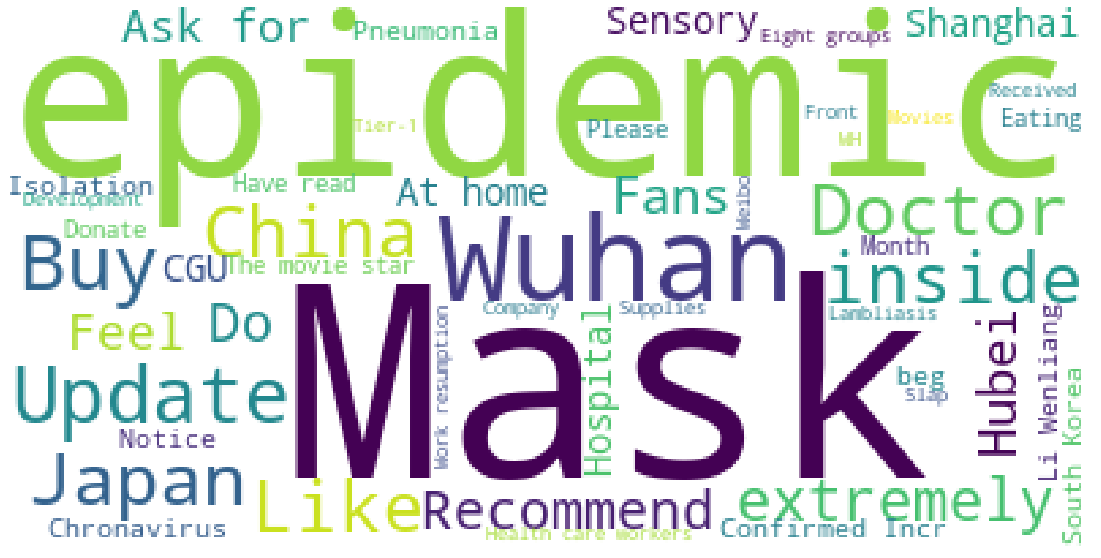

In [67]:
# Use the Word Cloud library to visualize word frequencies

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20,10))

#Create word cloud subject and set the parameters within the word cloud

wordcloud_en=WordCloud(background_color="white", max_font_size=100, margin=1)

#Fit word frequencies in word cloud

word_frequence_en={x[0]:x[1] for x in df_english_version.head(50).values}
wordcloud_en=wordcloud_en.fit_words(word_frequence_en)
word_frequence_en

#Visualize using the default mode

plt.imshow(wordcloud_en)
plt.axis("off")
plt.show()
mpimg.imsave("word_cloud_english.jpg", wordcloud_en)

After removing all the meaningless and adjunction words, the word cloud above shows the word frequencies of all the topics for past two weeks.

The words related to Chronavirus are the hottest words including Wuhan, Mask, Chronavirus, Epidemic, Chinese Doctors, Hubei, Isolation and Update. This means that young people in China are most interested in medical resources such as doctors and masks and updated information on the condition of Chronavirus. 

We can analyze these top 100 words to understand whether they stand for positive or negative emotions within texts and update them in the emotion dictionaries to calculate the emotion scores.

### Part3: Sentiment Analysis

The Sentiment Analsis part aims to calculate a sentiment value for each topic based on the modified emotion dictionaries which are designed only for current content of topics.

The modified emotion dictionaries include two parts: the first part comes from the developed dictionaries downloaded from online sources (including Tsinghua Li Jun Emotion Dictionary, Hownet Emotion Dictionary and NTUSD Simplified Emotion Dictionary) and the second part comes from the special words used in the topics. There is possibility that some words are neutral words in general but have positve or negative meaning under Chronavirus context.

In the process of calculating the sentiment values, we also take care of thoes frequency and null words which may mitigate or strengthen emotions.

Based on the sentiment values, this part finally explores to present how sentiment values changed as time passed by based on the post dates. 

#### Step 1: Modify Emotion Dictionary

The top 100 word frequencies are at least 10 times. So, we need to mannually add these words into positive and negative emotion dictionaries to better calculate emotion scores.

In [119]:
word_count_100.head(50)

,word,count
0,口罩,84
1,疫情,62
2,武汉,59
3,更新,42
4,买,40
5,医生,37
6,日本,37
7,中国,35
8,里,35
9,喜欢,34


In [120]:
word_count_100.tail(50)

,word,count
50,新,15
51,想见,15
52,骂,15
53,支援,15
54,安利,15
55,捐赠,14
56,爱,14
57,科普,14
58,为啥,14
59,美国,14


In [121]:
# We should notice that most of the Chronavirus related words convey negative attitudes of the public. So, we need to add them into negative list. Additionally, most of the donation and volunteering related posts convey a sense of hope the public which should be included in the positie list.

negative_list=['口罩','疫情','武汉','日本','湖北','wh','物资','医院','在家','确诊','肺炎','新冠','寄生虫','李文亮','求','医护人员','一线','骂','求助','延迟','死','新增','感染','三奇','有感','美国','韩国','上班','复工']

positive_list=['更新','哈哈哈','送','支援','捐赠','捐','杭州','发货']

In [122]:
# Load the organized dictionaries which have been downloaded from online resources.
import xlrd

positive=pd.read_excel('Positive.xlsx')
negative=pd.read_excel('Negative.xlsx')
negative_comment=pd.read_excel('Negative Comment.xlsx')
positive_comment=pd.read_excel('Positive Comment.xlsx')
none = pd.read_excel('None.xlsx')
most = pd.read_excel('Most.xlsx')
more = pd.read_excel('More.xlsx')
very = pd.read_excel('Very.xlsx')
little = pd.read_excel('Little.xlsx')
insufficient = pd.read_excel('Insufficiently.xlsx')
over = pd.read_excel('Over.xlsx')

# In order to proceed to later analysis, we need to convert all these data frames into list. We can write two loops which first store all the data frames as a list in a array and then separate them into individual lists.

sentlist = [positive, negative, negative_comment, positive_comment, none, most, more, very, little, insufficient, over]
i=0
list_array = []
while i in range(0,len(sentlist)):
    list_array.append(sentlist[i].values)
    i=i+1

i=0
polist = []
nelist = []
necolist = []
pocolist = []
nonelist = []
mostlist = []
morelist = []
verylist = []
littlelist = []
insulist = []
overlist = []
lists = [polist,nelist,necolist,pocolist,nonelist,mostlist,morelist,verylist,littlelist,insulist,overlist]
while i in range(0,len(list_array)):
    j=0
    while j in range(0,len(list_array[i])):
        lists[i].append(list_array[i][j][0])
        j=j+1
    i=i+1 

In [123]:
# Now we have separate lists of emotion dictionaries and then we have to add new words into positive list and negative list.

polist_complete = polist+positive_list
polist_clean=[]
for i in polist_complete:
    if i not in polist_clean:
        polist_clean.append(i)

print(len(polist_complete))
print(len(polist_clean))

nelist_complete = nelist+negative_list
nelist_clean=[]
for j in nelist_complete:
    if j not in nelist_clean:
        nelist_clean.append(j)

print(len(nelist_complete))
print(len(nelist_clean))

# However we still need to make sure that there is no duplicate word in these two lists.
duplicate_list_1=[]
for word in nelist_clean:
    if word in polist_clean:
        duplicate_list_1.append(word)

duplicate_list_2=[]
for word in polist_clean:
    if word in nelist_clean:
        duplicate_list_2.append(word)

9221
8249
14025
12261


In [124]:
# Such a long list of duplicate words. We have to deal with these words to decide whether it belongs to positive or negative words.
print(len(duplicate_list_1))
print(len(duplicate_list_2))

109
109


In [125]:
df_duplicate = pd.DataFrame(duplicate_list_1, columns=['word'])

In [126]:
df_duplicate.head(50)

,word
0,溺爱
1,疯狂
2,习惯
3,专门
4,讨好
5,联合
6,窝心
7,安心
8,嘻嘻哈哈
9,光亮


In [127]:
#df_duplicate.to_excel('duplicate_words.xlsx', index = False)

In [130]:
# After mannually dividing these duplicate words into positive and negative words, reload them as data frames and add them into positive and negative lists.

duplicate_positive = pd.read_excel('duplicate_words.xlsx', sheet_name='positive')
duplicate_negative = pd.read_excel('duplicate_words.xlsx', sheet_name='negative')

duplicate_positive_words = []
duplicate_negative_words = []

for i in duplicate_positive['Positive']:
    duplicate_positive_words.append(i)

for j in duplicate_negative['Negative']:
    duplicate_negative_words.append(j)

# Remove duplicate words in both lists and then add new words to these lists
for i in duplicate_list_1:
    nelist_clean.remove(i)
    polist_clean.remove(i)
    

ValueError: list.remove(x): x not in list

In [131]:
polist_new = polist_clean+duplicate_positive_words
nelist_new = nelist_clean+duplicate_negative_words

In [132]:
len(polist_new)

8186

In [133]:
#Start calculating emotions scores by defining required functions

#deal with potential negative numbers
def transoform_to_positive_num(poscount, negcount):
    pos_count=0
    neg_count=0
    if poscount<0 and negcount>=0:
        neg_count = neg_count+negcount-poscount
        poscount=0
        
    elif negcount<0 and poscount>=0:
        pos_count = pos_count+poscount-negcount
        negcount=0
        
    elif poscount<0 and negcount<0:
        pos_count=-poscount
        neg_count=-negcount
        
    else:
        pos_count = poscount
        neg_count = negcount
    return (pos_count, neg_count)

In [134]:
#Assign weighted values to different level of frequency words

def match(w, sentiment_value):
    if w in mostlist:
        sentiment_value=sentiment_value*4
    elif w in verylist:
        sentiment_value=sentiment_value*3
    elif w in morelist:
        sentiment_value=sentiment_value*2
    elif w in littlelist:
        sentiment_value=sentiment_value*1.5
    elif w in insulist:
        sentiment_value=sentiment_value*0.5
    elif w in nonelist:
        sentiment_value=sentiment_value*(-1)
    return sentiment_value

In [135]:
#calculate the score for one single topic in the list topics_s

def topic_score(word_list):
    topic_score=[]
    i=0
    s=0
    poscount=0
    negcount=0
    for word in word_list:
        if word in polist_new:
            poscount=poscount+1
            for w in line[s:i]:
                poscount=match(w, poscount)
            s=i+1
        elif word in nelist_new:
            negcount=negcount+1
            for w in line[s:i]:
                negcount=match(w,negcount)
            s=i+1
        elif word=='!' or word=='！':
            for w2 in line[::-1]:
                if w2 in polist:
                    poscount = poscount+2
                    break
                elif w2 in nelist:
                    negcount = negcount+2
                    break
        i=i+1
    topic_score.append(transoform_to_positive_num(poscount, negcount))
    result=poscount-negcount
    return result

In [137]:
# Calculate the sentiment scores for all the topics and return a list which contains all the scores.

score_list=[]
i=0
while i in range(0,len(topics_s)):
    score_list.append(topic_score(topics_s[i]))
    i=i+1

In [140]:
# Assign each score to its topic and create a new data frame.

df_topics_remove = pd.DataFrame(topics_remove, columns=['Topics_remove'])
df_scores = pd.DataFrame(score_list, columns=['Sentiment Values'])
df_final = pd.concat([df_topics_remove, df_scores],axis=1)


In [159]:
# As we want to track people's attitutes as time passed by, we need to also combine the post dates with sentiment values in one data frame

def get_same_topic(i):
    df = df_concat[df_concat['Topics']==topics_remove[i]]
    return df
    
def get_post_date(df):
    date_array = df['Post Dates'].values
    return date_array[-1]

dates_list = []
i=0
while i in range(0,len(topics_remove)):
    dates_list.append(get_post_date(get_same_topic(i)))
    i=i+1

df_dates = pd.DataFrame(dates_list, columns=['Post Dates'])
df_final_1 = pd.concat([df_final, df_dates],axis=1)

In [160]:
df_final_1

,Topics_remove,Sentiment Values,Post Dates
0,日本预测重庆大爆发？15万人？,-2,2020-02-07
1,有蚊子了！！！！！！！！！,18,2020-02-07
2,上海只公布了昨天确诊的轨迹，地址就错了3个！！！,5,2020-02-07
3,突然觉得生小孩真的很没有意思,-2,2020-02-07
4,湖北潜江市委sj:从武汉得到消息后“先下手”，哪怕冒风险！,1,2020-02-07
...,...,...,...
1924,俄媒：一名中国男子解除隔离出院后，在库尔斯克市附近遭杀害,-1,2020-02-20 22:42:14
1925,“我身体需要你”？？这话也太羞耻了吧！！,3,2020-02-20 22:51:15
1926,新四大墙头胡一天哪里来的自信拉踩国超许凯宋威龙 是粉丝口中的所谓实绩绝代双骄吗,2,2020-02-20 23:24:15
1927,人类已知的七种可感染人的冠状病毒，其中三种有致命性。,-1,2020-02-20 22:06:59


In [175]:
# The average sentiment score each day.

#Remove the specific times of the Post Dates column.
def remove_time(dates):
    new_dates = dates.split()[0]
    return new_dates

df_final_1['Dates']=df_final_1['Post Dates'].apply(remove_time)
df_final_1.drop(['Post Dates'], axis=1)

#Calculate the average scores for each day.

df_average_values = df_final_1.groupby(['Dates']).mean()
df_average_values.reset_index(inplace = True)


In [185]:
df_average_values[df_average_values['Dates']>='2020-01-23']

,Dates,Sentiment Values
98,2020-01-23,0.000000
99,2020-01-25,3.000000
100,2020-01-26,2.000000
101,2020-01-29,0.666667
102,2020-01-30,0.000000
103,2020-01-31,-1.000000
104,2020-02-02,0.000000
105,2020-02-03,-1.000000
106,2020-02-04,-0.500000
107,2020-02-05,1.500000


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 <a list of 26 Text xticklabel objects>)

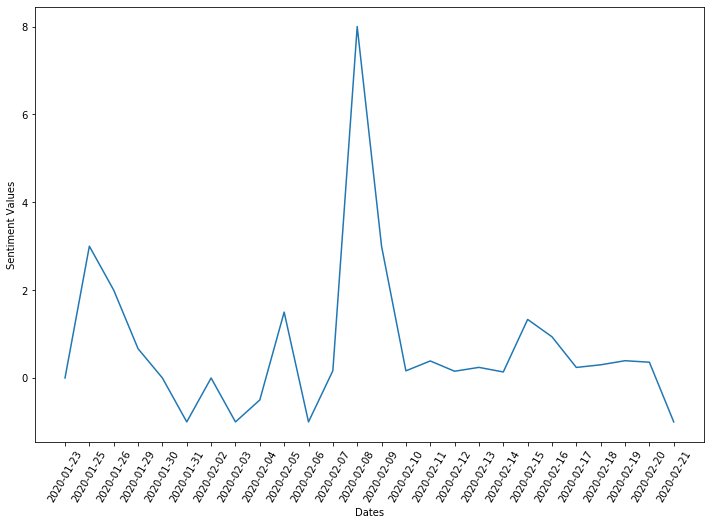

In [187]:
#Plot a line plot to visualize change of emotion scores. As we are only interested in the change of scores around Choronavirus period, we will only plot this period of time.

plt.figure(figsize=(12,8))
df_visualize = df_average_values[df_average_values['Dates']>='2020-01-23']
sns.lineplot(x='Dates', y='Sentiment Values', data= df_visualize)
plt.xticks(rotation=60)

Wuhan has been locked down since January 23rd, 2020 and the line plot above plots the emotion scores since 01/23/2020. The emotion scores stays at low level for more than one week and then suddenly reaches its peak after two weeks of Wuhan's lock-down. Such trend makes sense because Wuhan, even the entire China, was thrown into a total mess during the first one and a half weeks after the lock down. Thousands of people cannot be treated well in hospitals and had to be isolated at home. The result is death. 

Whereas, when over 40000 doctors and nurses gathered in Wuhan to provide medical help for patients in Wuhan, more and more positive posts which stated their gratitudes for these people emerged on the internet. With less and less neagtive posts on untreated patients and more and more good news from front tier hospitals, the public anger to the misbehave of government started to calm down and we can see that after 02/10/2020, the emotion scores flattened and fluctuated around zero.

However, it should be noticed that it is the imbalance of our dataset that causes such features. As it has been stated before, we just grabbed the top 250 topics starting from 02/07/2020 and there might just few posts before this date in our dataset. But, just few posts are not enough to describe the general public attitude and it is possible that only the hottest posts will remain the top 250 topics for two weeks. In this case, the emotion might become extremely positive of negative. We can look into these peak values separately for further analysis.